In [1]:
#all of the pip installs you will need
!pip install openpyxl xlrd
!pip install polars

In [2]:

import numpy as np
import sklearn as sk
import polars as pl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.colorbar as colorbar
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import pandas as pd
import math
import seaborn as sns 

In [3]:
#Initializes the file path to the excel file
file_path = "/Users/jaden/Downloads/Stock Data No CapIQ.xlsx"
# Read the Excel file with pandas
df = pd.read_excel(file_path, header=0, engine='openpyxl', sheet_name='Expanded Data')
summary = df.describe()
print(summary)

                  Corresponding Date   Revenue ($M)  Gross Profit Margin  \
count                           9947    9980.000000          9957.000000   
mean   2021-07-06 11:12:35.323213056    6879.945880             0.429930   
min              2018-04-29 00:00:00   -3255.788000            -2.728851   
25%              2020-03-31 00:00:00    1239.912500             0.270895   
50%              2021-06-30 00:00:00    2742.000000             0.421971   
75%              2022-09-30 00:00:00    5905.000000             0.598622   
max              2023-12-31 00:00:00  169961.000000             3.018172   
std                              NaN   13678.677294             0.251770   

        EBITDA ($M)  EBITDA Margin  Net Income ($M)  \
count   9460.000000    9949.000000      9980.000000   
mean    1329.001177       0.185412       717.071140   
min   -59740.000000      -2.897435    -49746.000000   
25%      279.460750       0.093561       113.910250   
50%      579.443000       0.178545      

In [4]:
#Describing all of the data in the excel file
print(df.describe())

#Printing the first 5 rows of the data
print(df.head())
#Printing the last 5 rows of the data
print(df.tail())
#Printing the shape of the data
print(df.shape)
#Printing the columns of the data
print(df.columns)
#Printing the data types of the data
print(df.dtypes)

                  Corresponding Date   Revenue ($M)  Gross Profit Margin  \
count                           9947    9980.000000          9957.000000   
mean   2021-07-06 11:12:35.323213056    6879.945880             0.429930   
min              2018-04-29 00:00:00   -3255.788000            -2.728851   
25%              2020-03-31 00:00:00    1239.912500             0.270895   
50%              2021-06-30 00:00:00    2742.000000             0.421971   
75%              2022-09-30 00:00:00    5905.000000             0.598622   
max              2023-12-31 00:00:00  169961.000000             3.018172   
std                              NaN   13678.677294             0.251770   

        EBITDA ($M)  EBITDA Margin  Net Income ($M)  \
count   9460.000000    9949.000000      9980.000000   
mean    1329.001177       0.185412       717.071140   
min   -59740.000000      -2.897435    -49746.000000   
25%      279.460750       0.093561       113.910250   
50%      579.443000       0.178545      

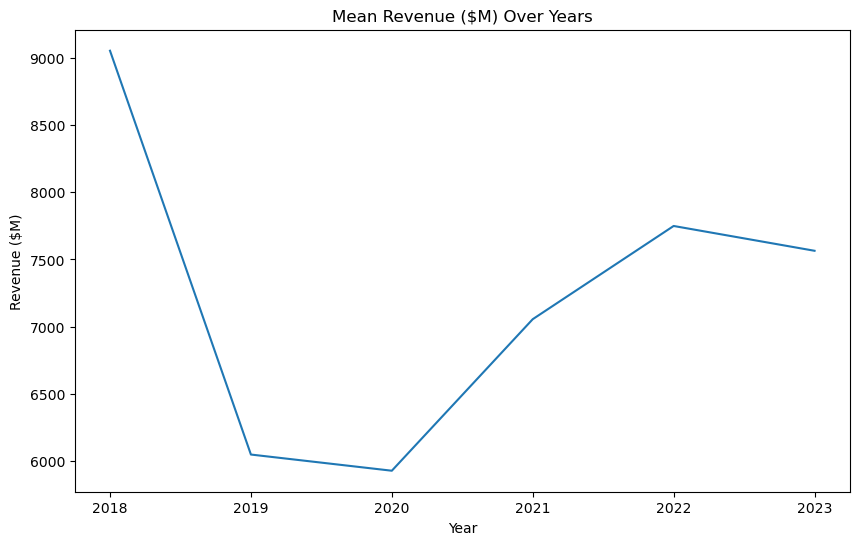

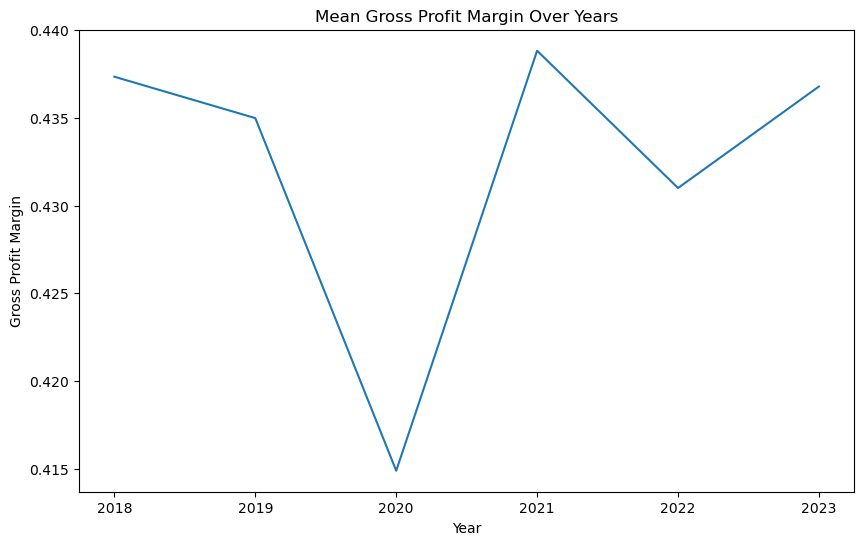

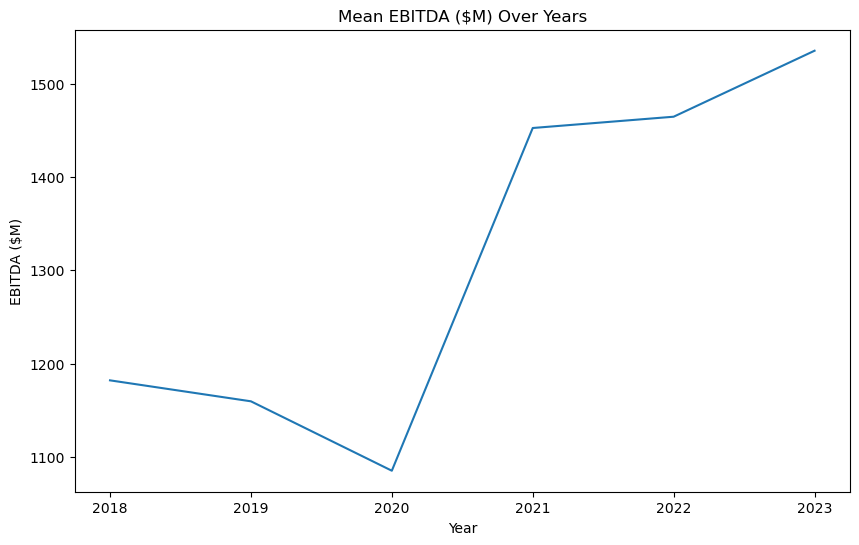

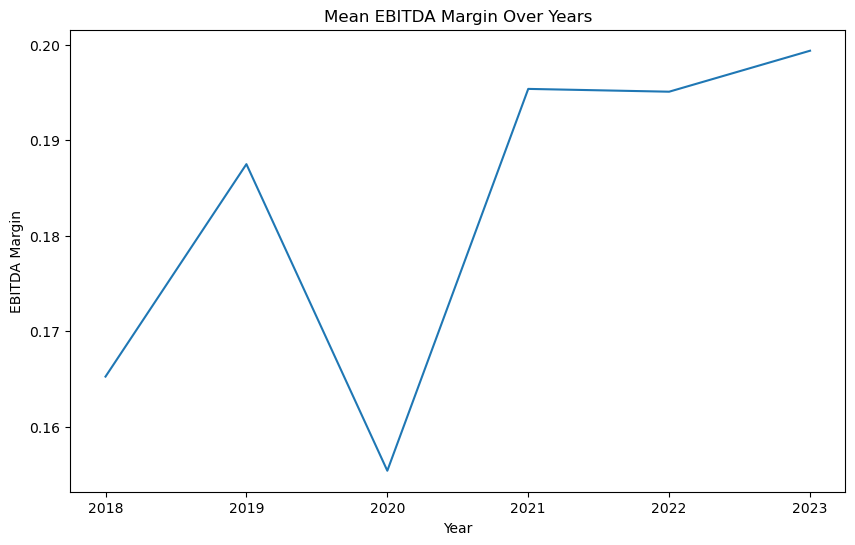

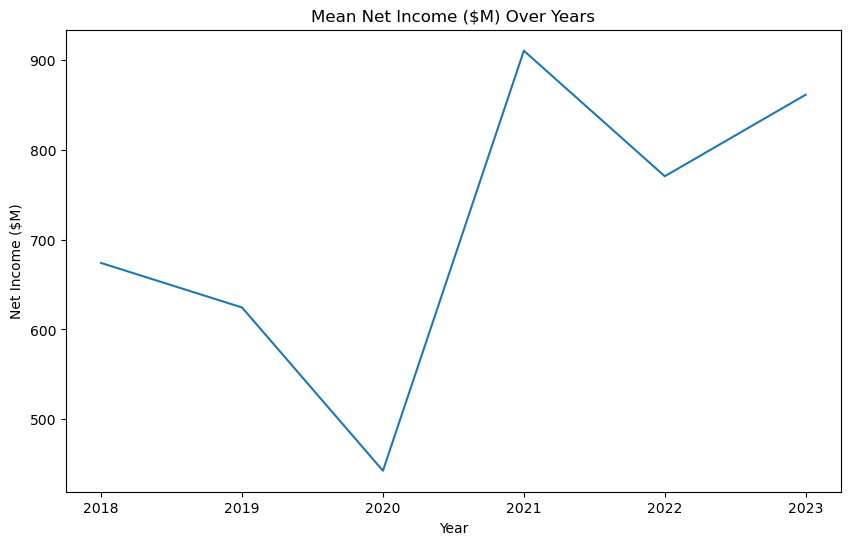

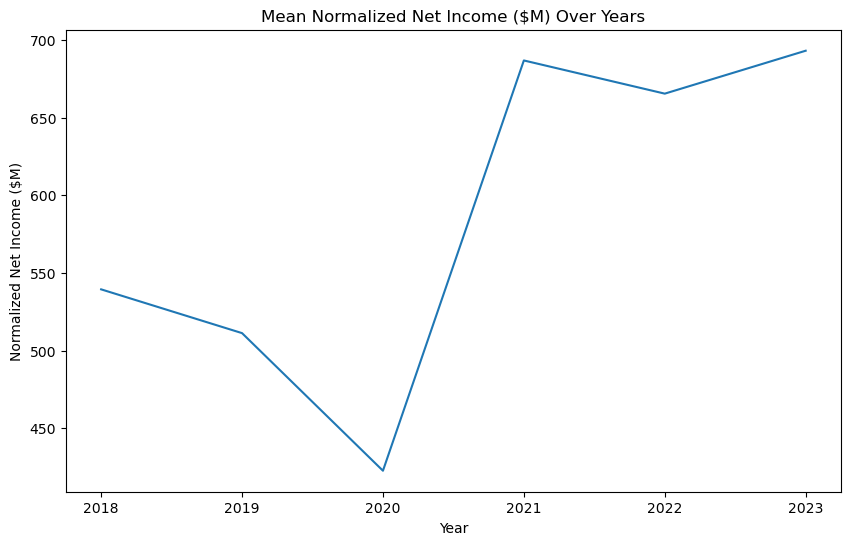

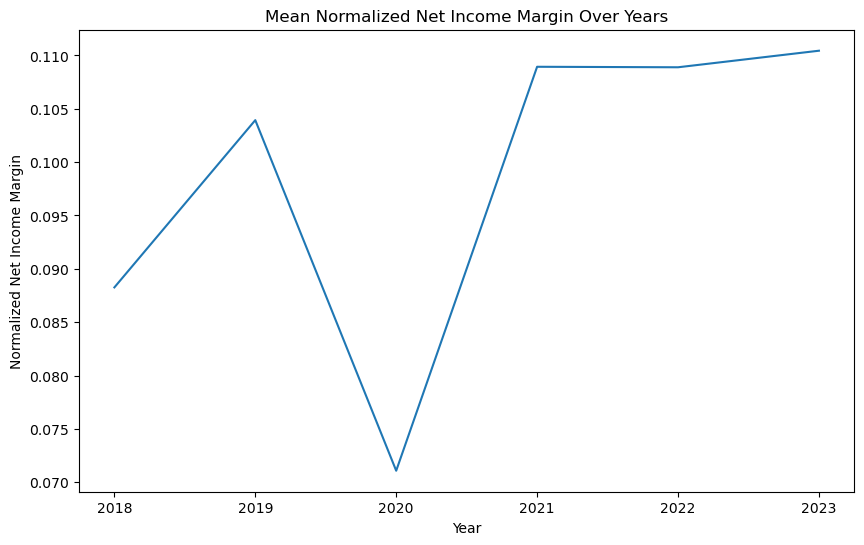

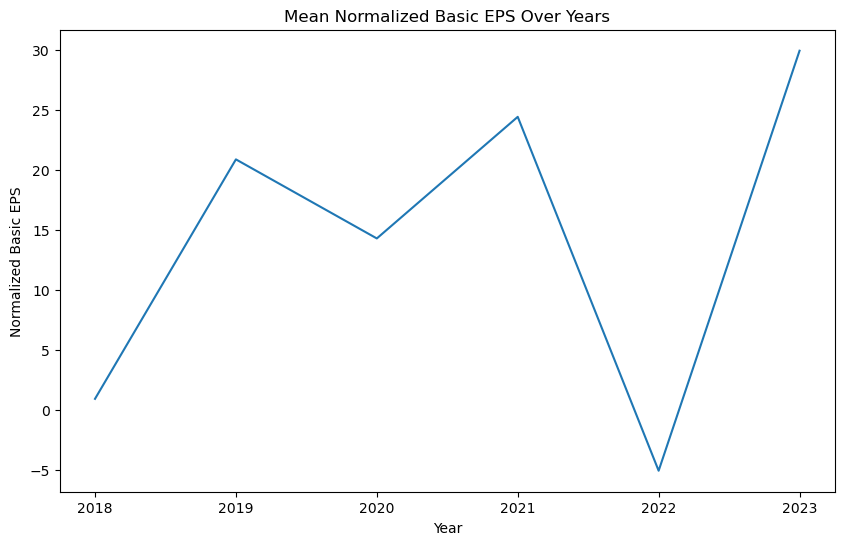

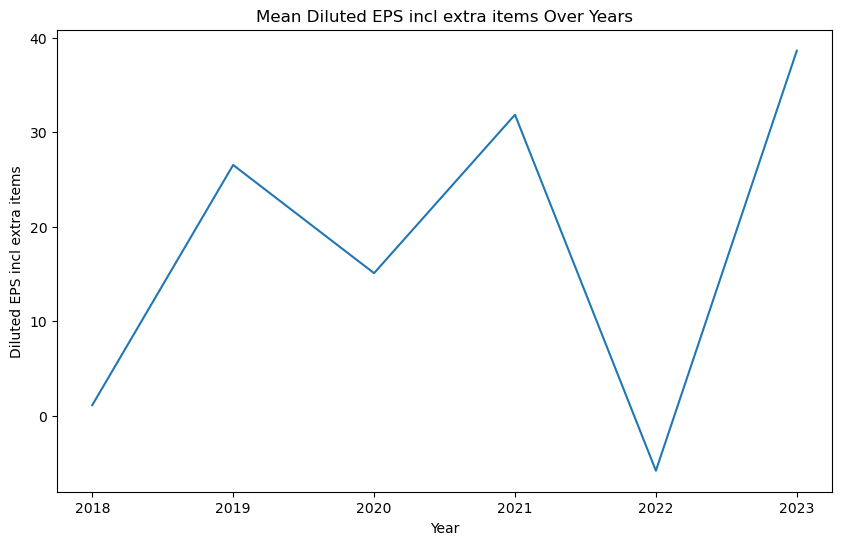

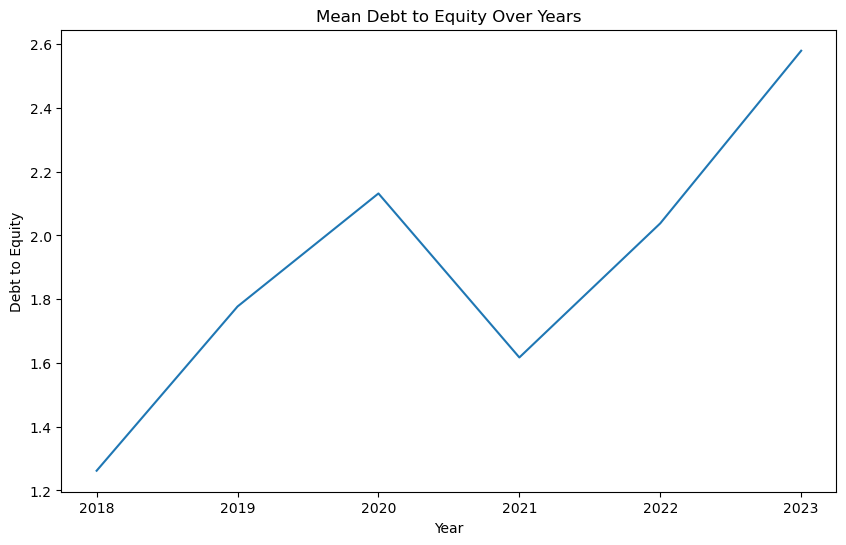

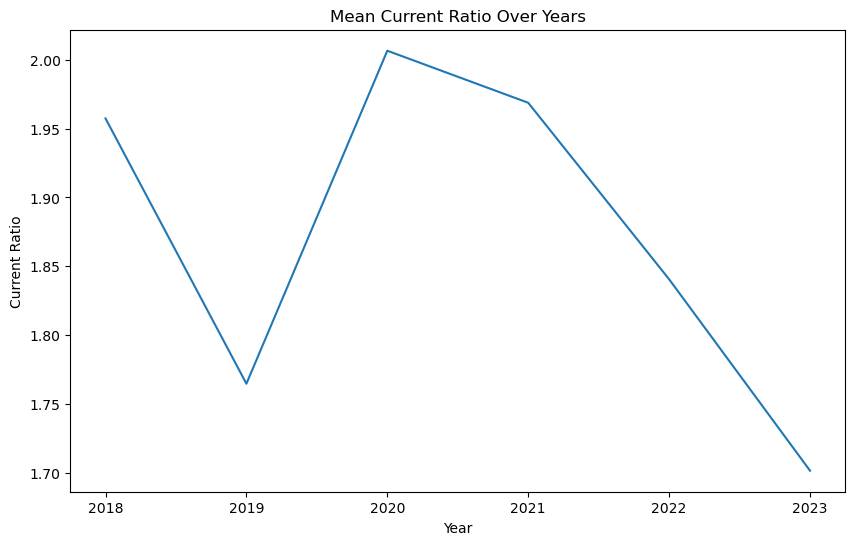

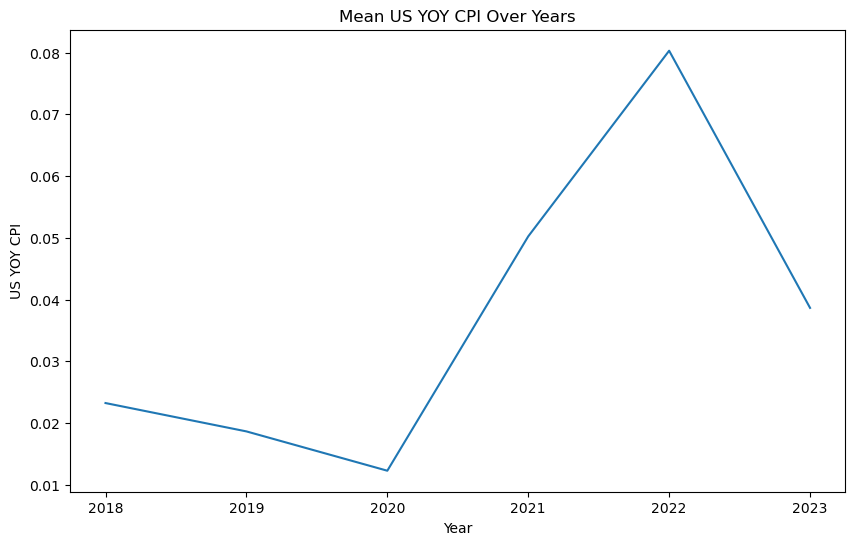

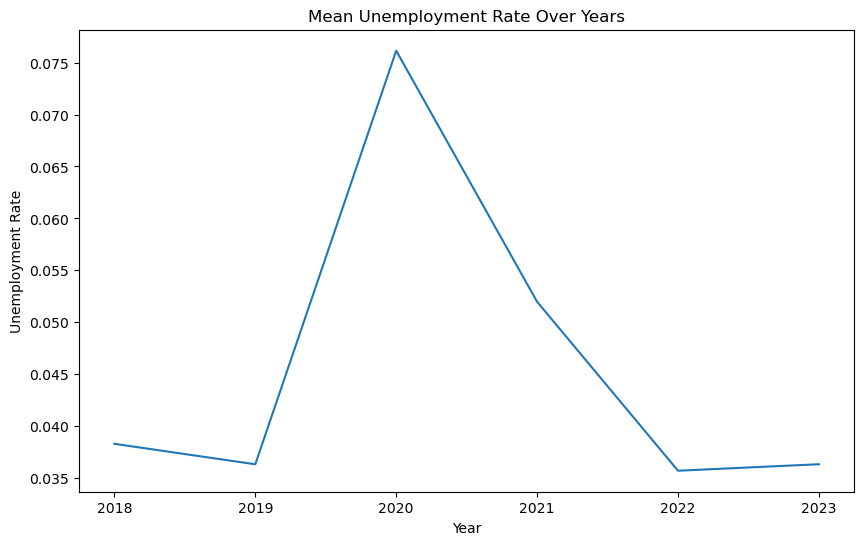

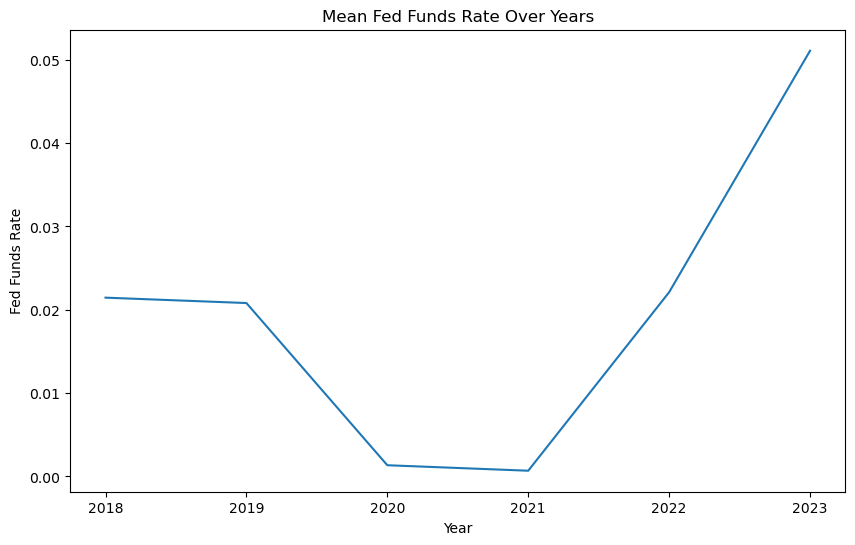

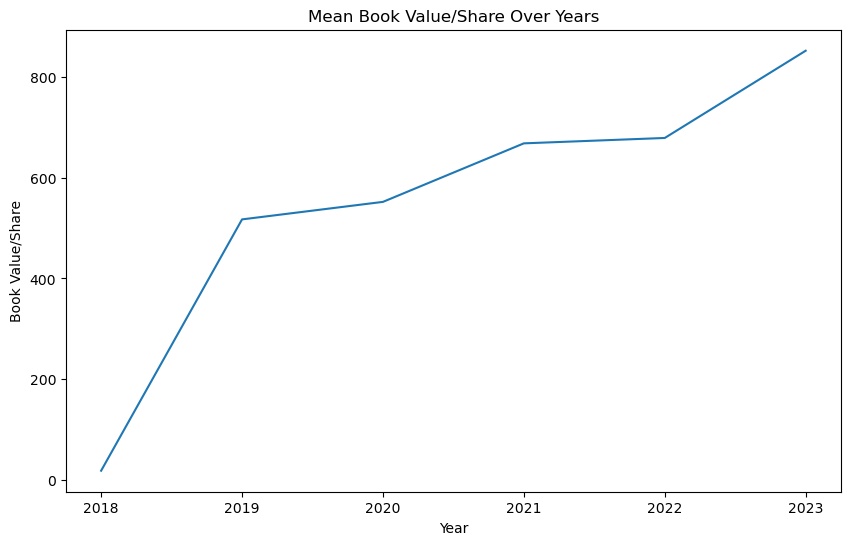

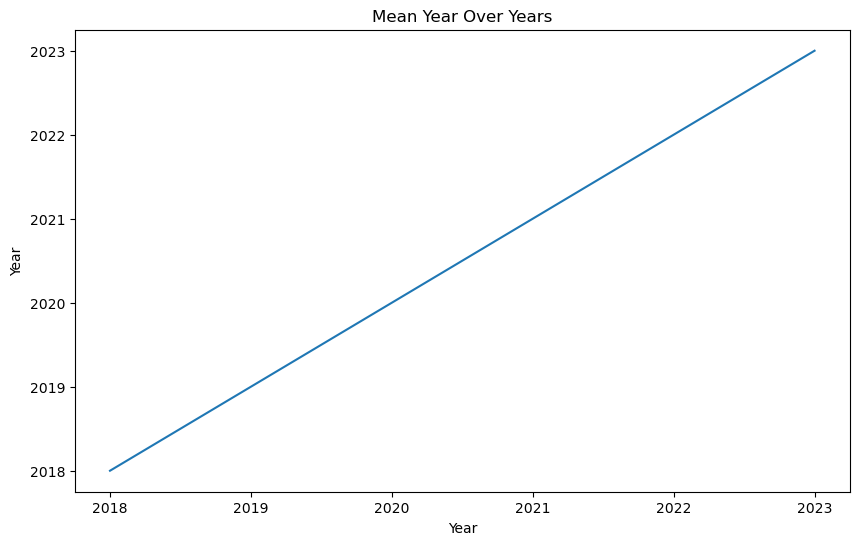

In [5]:

#Setting up the Year column 
df['Year'] = df['Corresponding Date'].dt.year


# Make sure plots are displayed in Jupyter notebook
%matplotlib inline

# Extract the year from the 'Corresponding Date' column
df['Year'] = df['Corresponding Date'].dt.year

# Get the float64 columns
float64_columns = df.select_dtypes(include=['float64']).columns

# Check if there are any float64 columns
if not float64_columns.empty:
    # Create a separate plot for each float64 column
    for column in float64_columns:
        plt.figure(figsize=(10, 6))
        df.groupby('Year')[column].mean().plot(kind='line')
        plt.title(f'Mean {column} Over Years')
        plt.ylabel(column)
        plt.show()
else:
    print("No float64 columns found in the DataFrame.")

In [6]:
# Group the data by company
grouped = df.groupby('Company Name')

# Determine the number of rows and columns for the subplots
num_companies = len(grouped)
num_cols = 3  # Adjust the number as needed
num_rows = num_companies // num_cols + (num_companies % num_cols > 0)

# Calculate the number of companies for each figure
num_companies_fig1 = num_companies // 2
num_companies_fig2 = num_companies - num_companies_fig1

# Create the first figure
fig1, axs1 = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))  # Adjust the size as needed
axs1 = axs1.flatten()
for ax, (name, group) in zip(axs1, grouped):
    if num_companies_fig1 <= 0:
        break
    group.plot(x='Year', y='Revenue ($M)', ax=ax, title=name)
    num_companies_fig1 -= 1
for ax in axs1[num_companies_fig1:]:
    ax.remove()
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust the spacing as needed
plt.show()

# Create the second figure
fig2, axs2 = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))  # Adjust the size as needed
axs2 = axs2.flatten()
for ax, (name, group) in zip(axs2, grouped):
    if num_companies_fig2 <= 0:
        break
    group.plot(x='Year', y='Revenue ($M)', ax=ax, title=name)
    num_companies_fig2 -= 1
for ax in axs2[num_companies_fig2:]:
    ax.remove()
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust the spacing as needed
plt.show()

<Figure size 1500x83500 with 0 Axes>

<Figure size 1500x83500 with 0 Axes>

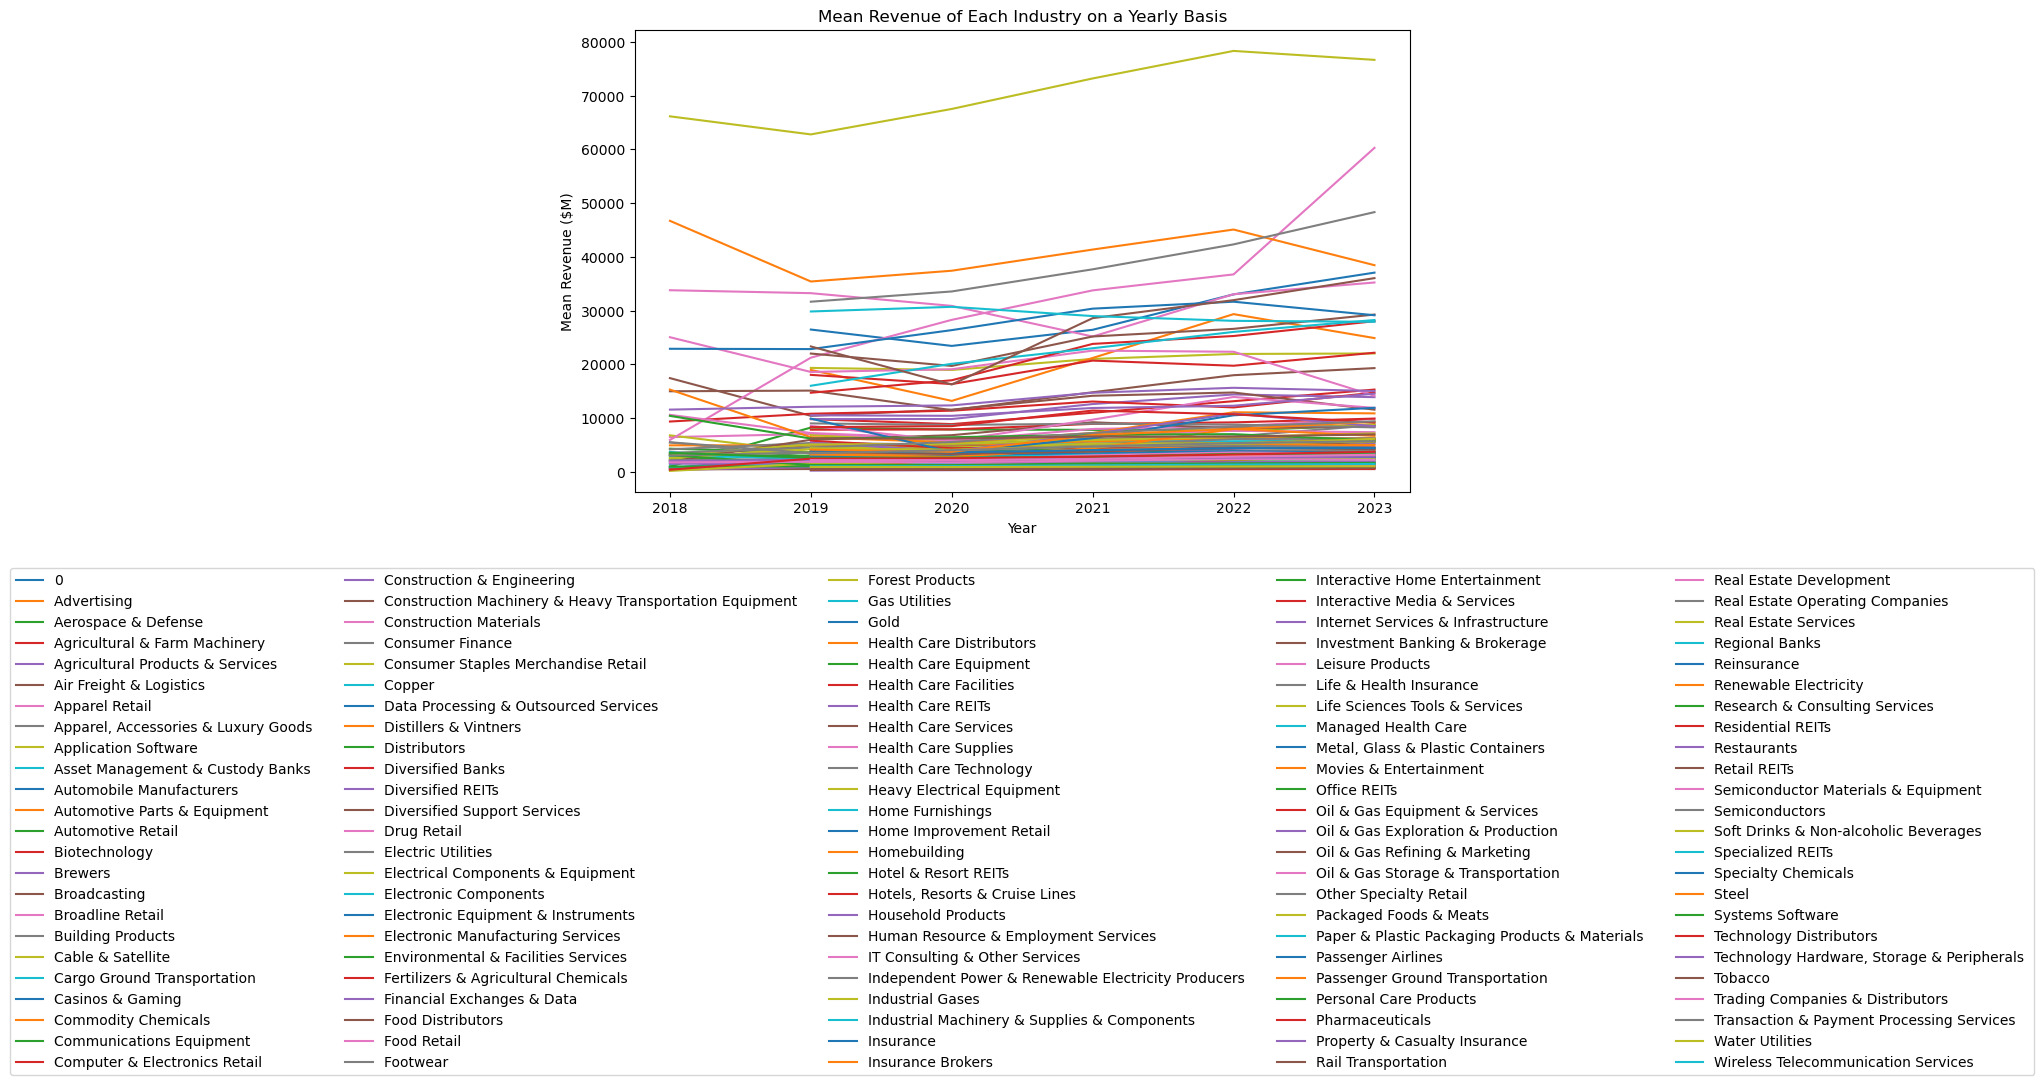

In [7]:
# Extract the year from the 'Corresponding Date' column
# Calculate the mean revenue of each industry on a yearly basis
mean_revenue = df.groupby(['Primary Industry', 'Year'])['Revenue ($M)'].mean().reset_index()

# Pivot the data to have industries as columns, years as index and mean revenue as values
pivot_data = mean_revenue.pivot(index='Year', columns='Primary Industry', values='Revenue ($M)')

# Plot the data
pivot_data.plot(kind='line', figsize=(10, 6))

plt.title('Mean Revenue of Each Industry on a Yearly Basis')
plt.ylabel('Mean Revenue ($M)')

# Move the legend below the plot
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5)

plt.show()

In [8]:
#Correlation matrix of the float64 columns

# Getting the float64 columns
float64_columns = df.select_dtypes(include=['float64'])

# Calculate the correlation matrix
corr_matrix = float64_columns.corr()
print(corr_matrix)

                              Revenue ($M)  Gross Profit Margin  EBITDA ($M)  \
Revenue ($M)                      1.000000            -0.181316     0.635772   
Gross Profit Margin              -0.181316             1.000000     0.110715   
EBITDA ($M)                       0.635772             0.110715     1.000000   
EBITDA Margin                    -0.112709             0.612517     0.185678   
Net Income ($M)                   0.489686             0.086579     0.896721   
Normalized Net Income ($M)        0.542858             0.083496     0.965622   
Normalized Net Income Margin     -0.053301             0.420241     0.193086   
Normalized Basic EPS              0.108833             0.054327     0.556445   
Diluted EPS incl extra items      0.110747             0.053189     0.554342   
Debt to Equity                    0.009038             0.006670    -0.001881   
Current Ratio                    -0.062848             0.118475    -0.032783   
US YOY CPI                        0.0461

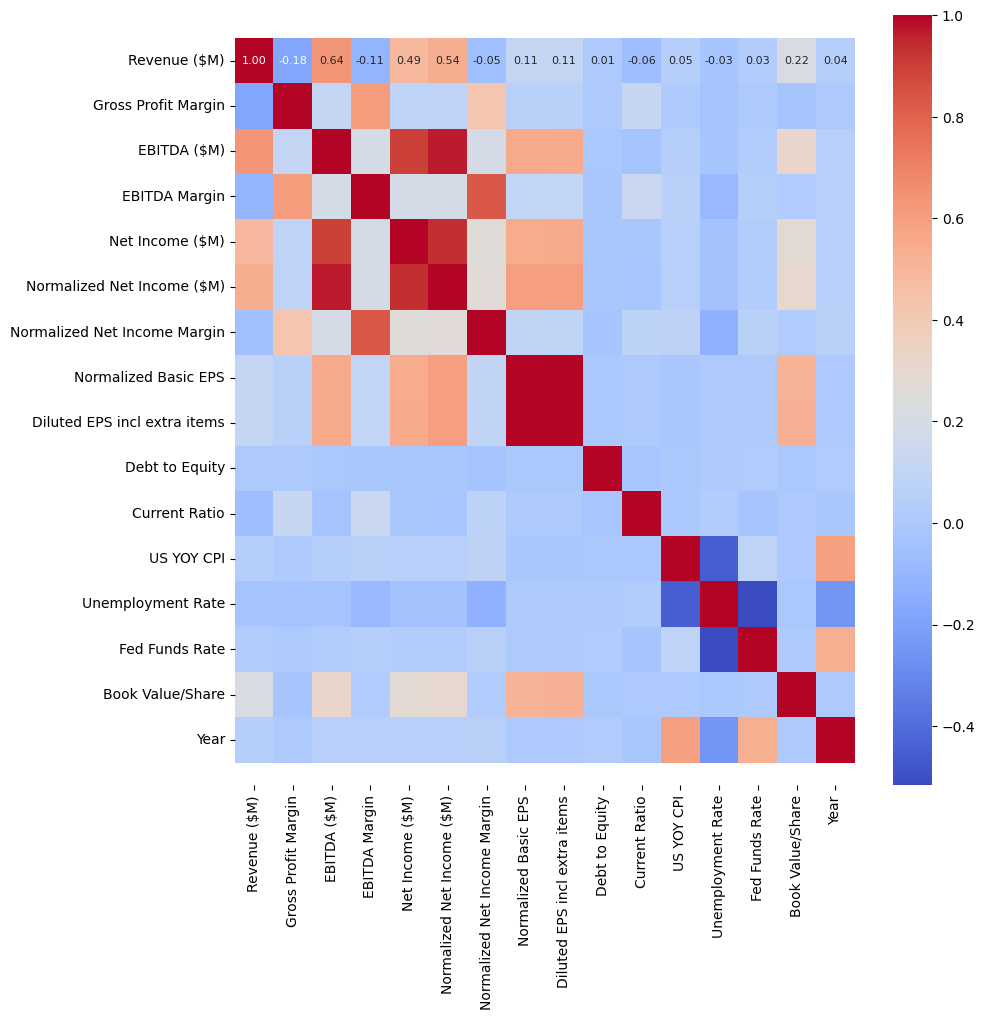

In [9]:
#Making a cooler heat map

# Create a figure with a specified size
plt.figure(figsize=(10, 10))

# Create a heatmap with smaller annotations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})

# Adjust the margins
b, t = plt.ylim()  # Get the current bottom and top limits
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # Update the ylim(bottom, top) values

plt.show()

In [10]:
df


,Company Name,Ticker,Period Ending,Month and Year,Corresponding Date,Last Sale Price,Revenue ($M),Gross Profit Margin,EBITDA ($M),EBITDA Margin,...,Diluted EPS incl extra items,Primary Industry,Debt to Equity,Current Ratio,EBITDA/Int Expense,US YOY CPI,Unemployment Rate,Fed Funds Rate,Book Value/Share,Year
0,3M Company,NYSE:MMM,FQ42023,Dec2023,2023-12-31,109.32,8013.0,0.420441,1550.0,0.141020,...,1.70022,Specialty Chemicals,3.480279,1.07073,4.45148,0.033521,0.037,0.0533,8.69917,2023.0
1,3M Company,NYSE:MMM,FQ32023,Sep2023,2023-09-30,93.62,8312.0,0.449470,2270.0,0.252646,...,-3.74346,Specialty Chemicals,3.575776,1.04733,7.82072,0.036997,0.038,0.0533,8.45891,2023.0
2,3M Company,NYSE:MMM,FQ22023,Jun2023,2023-06-30,100.09,8325.0,0.452372,2159.0,0.205405,...,-12.35060,Specialty Chemicals,2.150948,1.44056,15.73958,0.029692,0.036,0.0508,14.12701,2023.0
3,3M Company,NYSE:MMM,FQ12023,Mar2023,2023-03-31,105.11,8031.0,0.427593,1790.0,0.180052,...,1.76000,Specialty Chemicals,1.103511,1.41749,15.42683,0.049850,0.035,0.0483,27.73023,2023.0
4,3M Company,NYSE:MMM,FQ42022,Dec2022,2022-12-31,119.92,8079.0,0.432479,2356.0,0.248793,...,0.97464,Specialty Chemicals,1.148070,1.54237,21.42174,0.064544,0.035,0.0433,26.80406,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,Zoetis Inc.,NYSE:ZTS,FQ12020,Mar2020,2020-03-31,117.69,1534.0,0.702086,652.0,0.393741,...,0.88000,Pharmaceuticals,2.430076,2.77281,12.64151,0.015393,0.044,0.0008,5.79743,2020.0
9976,Zoetis Inc.,NYSE:ZTS,FQ42019,Dec2019,2019-12-31,132.35,1674.0,0.683990,585.0,0.336917,...,0.80018,Pharmaceuticals,2.456425,2.62901,10.75893,0.022851,0.036,0.0155,5.69472,2019.0
9977,Zoetis Inc.,NYSE:ZTS,FQ32019,Sep2019,2019-09-30,124.59,1584.0,0.699494,674.0,0.395833,...,0.90000,Pharmaceuticals,2.485436,4.38973,12.35714,0.017113,0.035,0.0190,5.61725,2019.0
9978,Zoetis Inc.,NYSE:ZTS,FQ22019,Jun2019,2019-06-30,113.49,1547.0,0.701357,627.0,0.379444,...,0.77000,Pharmaceuticals,2.759435,4.17116,11.70909,0.016485,0.036,0.0240,5.04582,2019.0


In [15]:
# Filter the DataFrame to get the baseline period for each company (assuming FQ1 2019 here)
baseline_df = df[df['Period Ending'] == 'FQ12019']

# Create a dictionary directly without setting the index, ensuring we're getting unique baseline values per company
# This assumes 'Company Name' + 'Period Ending' uniquely identifies rows. If not, further refinement may be needed.
baseline_values = {row['Company Name']: {'Last Sale Price': row['Last Sale Price'], 
                                         'Revenue ($M)': row['Revenue ($M)'], 
                                         'EBITDA ($M)': row['EBITDA ($M)']}
                   for index, row in baseline_df.iterrows()}

# Revised function to calculate percentage change, using the baseline_values dict
def calculate_percentage_change(row, metric):
    baseline_info = baseline_values.get(row['Company Name'], {})
    baseline = baseline_info.get(metric, None)
    if baseline is not None and baseline != 0:  # Check for non-zero baseline
        current_value = row[metric]  # Assume row[metric] is already numeric due to prior pd.to_numeric conversion
        return (current_value - baseline) / baseline * 100
    return None

# Apply the calculation
for metric in ['Last Sale Price', 'Revenue ($M)', 'EBITDA ($M)']:
    metric_column_name = f'{metric} Change From Baseline (%)'
    df[metric_column_name] = df.apply(calculate_percentage_change, axis=1, args=(metric,))

# Display the first 20 rows to verify the changes
df[['Company Name', 'Period Ending', 'Last Sale Price Change From Baseline (%)', 
    'Revenue ($M) Change From Baseline (%)', 'EBITDA ($M) Change From Baseline (%)']].head(20)


,Company Name,Period Ending,Last Sale Price Change From Baseline (%),Revenue ($M) Change From Baseline (%),EBITDA ($M) Change From Baseline (%)
0,3M Company,FQ42023,-47.386659,1.907669,-25.730714
1,3M Company,FQ32023,-54.942728,5.710289,8.768567
2,3M Company,FQ22023,-51.828857,5.875620,3.449928
3,3M Company,FQ12023,-49.412841,2.136589,-14.230954
4,3M Company,FQ42022,-42.285109,2.747043,12.889315
5,3M Company,FQ32022,-46.818751,9.614651,-6.420700
6,3M Company,FQ22022,-37.717778,10.670228,-69.381888
7,3M Company,FQ12022,-28.347290,12.285387,3.833253
8,3M Company,FQ42021,-14.510540,9.525626,5.318639
9,3M Company,FQ32021,-15.574165,13.722498,12.314327


In [17]:
# Select the first 20 rows assuming they all belong to the same company
company_df = df.head(20)

# Select only numeric columns for this subset
numeric_company_df = company_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for the numeric columns of the first company
corr_matrix_company = numeric_company_df.corr()

# Extract the correlations of all features with 'Last Sale Price Change (%)'
last_sale_price_change_correlations_company = corr_matrix_company['Last Sale Price Change From Baseline (%)'].sort_values(ascending=False)

# Display the correlations with 'Last Sale Price Change (%)' for the first company
print(last_sale_price_change_correlations_company)


Last Sale Price                             1.000000
Last Sale Price Change From Baseline (%)    1.000000
Current Ratio                               0.701643
Gross Profit Margin                         0.680522
Normalized Net Income ($M)                  0.478438
Normalized Net Income Margin                0.456121
Normalized Basic EPS                        0.431331
EBITDA ($M) Change From Baseline (%)        0.422588
EBITDA ($M)                                 0.422588
Net Income ($M)                             0.420073
Diluted EPS incl extra items                0.413100
EBITDA Margin                               0.343392
Unemployment Rate                           0.309505
Book Value/Share                            0.262135
Revenue ($M) Change From Baseline (%)       0.179135
Revenue ($M)                                0.179135
US YOY CPI                                 -0.282014
Debt to Equity                             -0.372625
Fed Funds Rate                             -0.

In [18]:
df

,Company Name,Ticker,Period Ending,Month and Year,Corresponding Date,Last Sale Price,Revenue ($M),Gross Profit Margin,EBITDA ($M),EBITDA Margin,...,Current Ratio,EBITDA/Int Expense,US YOY CPI,Unemployment Rate,Fed Funds Rate,Book Value/Share,Year,Last Sale Price Change From Baseline (%),Revenue ($M) Change From Baseline (%),EBITDA ($M) Change From Baseline (%)
0,3M Company,NYSE:MMM,FQ42023,Dec2023,2023-12-31,109.32,8013.0,0.420441,1550.0,0.141020,...,1.07073,4.45148,0.033521,0.037,0.0533,8.69917,2023.0,-47.386659,1.907669,-25.730714
1,3M Company,NYSE:MMM,FQ32023,Sep2023,2023-09-30,93.62,8312.0,0.449470,2270.0,0.252646,...,1.04733,7.82072,0.036997,0.038,0.0533,8.45891,2023.0,-54.942728,5.710289,8.768567
2,3M Company,NYSE:MMM,FQ22023,Jun2023,2023-06-30,100.09,8325.0,0.452372,2159.0,0.205405,...,1.44056,15.73958,0.029692,0.036,0.0508,14.12701,2023.0,-51.828857,5.875620,3.449928
3,3M Company,NYSE:MMM,FQ12023,Mar2023,2023-03-31,105.11,8031.0,0.427593,1790.0,0.180052,...,1.41749,15.42683,0.049850,0.035,0.0483,27.73023,2023.0,-49.412841,2.136589,-14.230954
4,3M Company,NYSE:MMM,FQ42022,Dec2022,2022-12-31,119.92,8079.0,0.432479,2356.0,0.248793,...,1.54237,21.42174,0.064544,0.035,0.0433,26.80406,2022.0,-42.285109,2.747043,12.889315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,Zoetis Inc.,NYSE:ZTS,FQ12020,Mar2020,2020-03-31,117.69,1534.0,0.702086,652.0,0.393741,...,2.77281,12.64151,0.015393,0.044,0.0008,5.79743,2020.0,16.906725,5.429553,9.395973
9976,Zoetis Inc.,NYSE:ZTS,FQ42019,Dec2019,2019-12-31,132.35,1674.0,0.683990,585.0,0.336917,...,2.62901,10.75893,0.022851,0.036,0.0155,5.69472,2019.0,31.469157,15.051546,-1.845638
9977,Zoetis Inc.,NYSE:ZTS,FQ32019,Sep2019,2019-09-30,124.59,1584.0,0.699494,674.0,0.395833,...,4.38973,12.35714,0.017113,0.035,0.0190,5.61725,2019.0,23.760803,8.865979,13.087248
9978,Zoetis Inc.,NYSE:ZTS,FQ22019,Jun2019,2019-06-30,113.49,1547.0,0.701357,627.0,0.379444,...,4.17116,11.70909,0.016485,0.036,0.0240,5.04582,2019.0,12.734678,6.323024,5.201342
